Label
0    358332
1     89583
Name: count, dtype: int64
Original shape: (358332, 76), PCA shape: (358332, 23)
Random Forest - Accuracy: 0.9818, Precision: 0.9293, Recall: 0.9839, F1-Score: 0.9558


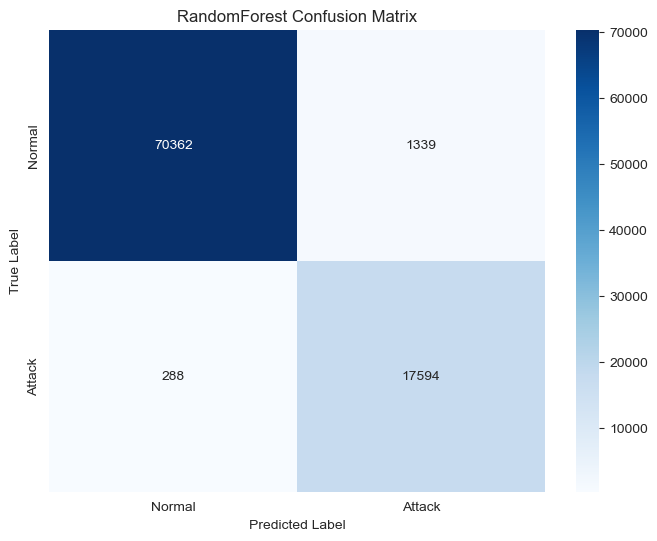

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
    classification_report

data = pd.read_csv('../data/Data.csv')
labels = pd.read_csv('../data/Label.csv')

# Convert all attack labels to 1 (binary classification)
labels['Label'] = labels['Label'].apply(lambda la: 1 if la >= 1 else 0)
print(labels['Label'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(data, labels['Label'], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original shape: {X_train.shape}, PCA shape: {X_train_pca.shape}")

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_pca, y_train)

y_pred_rf = rf_classifier.predict(X_test_pca)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(
    f"Random Forest - Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-Score: {f1_rf:.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'],
            yticklabels=['Normal', 'Attack'])
plt.title('RandomForest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()




In [5]:
data1 = pd.read_csv('../data/Data.csv')
labels1 = pd.read_csv('../data/Label.csv')


combined_data = pd.concat([data1, labels1], axis=1)

# Filter rows where 'Label' is 0
filtered_data = combined_data[combined_data['Label'] > 0]

# Extract filtered data and labels
filtered_data_only = filtered_data.drop(columns=['Label'])
filtered_labels_only = filtered_data['Label']

print("Filtered data shape:", filtered_data_only.shape)
print("Filtered labels shape:", filtered_labels_only.shape)

Filtered data shape: (89583, 76)
Filtered labels shape: (89583,)


In [6]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(filtered_data_only, filtered_labels_only, test_size=0.2, random_state=42)

In [7]:
y_train1 = y_train1 - 1
y_test1 = y_test1 - 1

In [9]:
scaler1 = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

In [10]:
pca_951 = PCA(n_components=0.95)  # Keep enough components to explain 95% of variance
X_train_pca_951 = pca_951.fit_transform(X_train_scaled1)
X_test_pca_951 = pca_951.transform(X_test_scaled1)

In [12]:
rf_classifier1 = RandomForestClassifier(random_state=42)

In [13]:
rf_classifier.fit(X_train_pca_951, y_train1)

RandomForestClassifier(random_state=42)

In [15]:
y_pred1 = rf_classifier.predict(X_test_pca_951)

In [16]:
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.7060


In [18]:
print("\nClassification Report:")
report = classification_report(y_test1, y_pred1, target_names=[f"Class {i}" for i in np.unique(y_test1)])
print(report)


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.42      0.32      0.36        68
     Class 1       0.59      0.25      0.35        77
     Class 2       0.49      0.23      0.31       917
     Class 3       0.72      0.76      0.74      6191
     Class 4       0.69      0.81      0.75      5859
     Class 5       0.81      0.58      0.68       929
     Class 6       0.74      0.68      0.71      3370
     Class 7       0.42      0.23      0.29       457
     Class 8       0.26      0.14      0.18        49

    accuracy                           0.71     17917
   macro avg       0.57      0.44      0.49     17917
weighted avg       0.70      0.71      0.70     17917

